Project for Udacity course: Introduction to Data Science

Reading in the dataset and necessary files

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

df = pd.read_csv('./listings.csv')
#df = pd.read_csv('./calendar.csv')
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


Trying to find out more about the dataset

In [3]:
# How many rows do we have?
num_rows = df.shape[0] #Provide the number of rows in the dataset
num_rows

3818

In [4]:
# How many columns do we have?
num_cols = df.shape[1] #Provide the number of columns in the dataset
num_cols

92

In [5]:
# Names of the columns
df_names = df.columns
df_names

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [6]:
# Type of the columns
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

Output tells me that there are 17 columns of the type float, 13 of the type int and 62 object columns, which contain non-numeric values. Interestingly, several columns where I expected a numeric value like prices, deposit and cleaning fee are objects.

In [7]:
# taking a look at the strange columns
df[['price','weekly_price','monthly_price','security_deposit','cleaning_fee']].head(10)

,price,weekly_price,monthly_price,security_deposit,cleaning_fee
0,$85.00,NaN,NaN,NaN,NaN
1,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00
2,$975.00,NaN,NaN,"$1,000.00",$300.00
3,$100.00,$650.00,"$2,300.00",NaN,NaN
4,$450.00,NaN,NaN,$700.00,$125.00
5,$120.00,$800.00,NaN,NaN,$40.00
6,$80.00,$575.00,NaN,$150.00,NaN
7,$60.00,$360.00,NaN,$150.00,$25.00
8,$90.00,$500.00,"$1,700.00",NaN,NaN
9,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00


Problem solved, all these columns contain the $ sign, which makes the data entry an object

In [9]:
# Names of the columns without NaNs
df.columns[np.sum(df.isnull()) == 0]

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'experiences_offered', 'picture_url', 'host_id', 'host_url',
       'host_verifications', 'street', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'room_type', 'accommodates', 'bed_type',
       'amenities', 'price', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'calendar_updated',
       'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'calendar_last_scraped',
       'number_of_reviews', 'requires_license', 'jurisdiction_names',
       'instant_bookable', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count'],
      dtype='object')

In [10]:
#Lets see if there are any surprises for the bathrooms, bedrooms, beds and how many are accommodated
df[['accommodates', 'bathrooms', 'bedrooms','beds']].describe()

,accommodates,bathrooms,bedrooms,beds
count,3818.000000,3802.000000,3812.000000,3817.000000
mean,3.349398,1.259469,1.307712,1.735394
std,1.977599,0.590369,0.883395,1.139480
min,1.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000
50%,3.000000,1.000000,1.000000,1.000000
75%,4.000000,1.000000,2.000000,2.000000
max,16.000000,8.000000,7.000000,15.000000


First surprise: Not everybody fills our all the information about the bathrooms and bedrooms


array([[<Axes: title={'center': 'accommodates'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'beds'}>]], dtype=object)

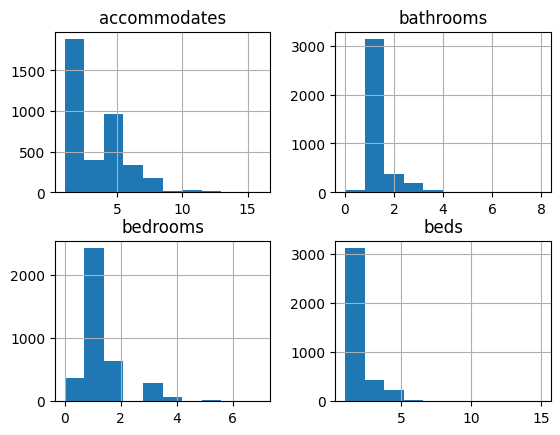

In [11]:
df[['accommodates', 'bathrooms', 'bedrooms','beds']].hist()

Somehow, these histogramms are strange, the binning does not make sense. Take the bedrooms, are the bin to the left (looks like for 2), to the right or centered (looks like for 4) at the values?

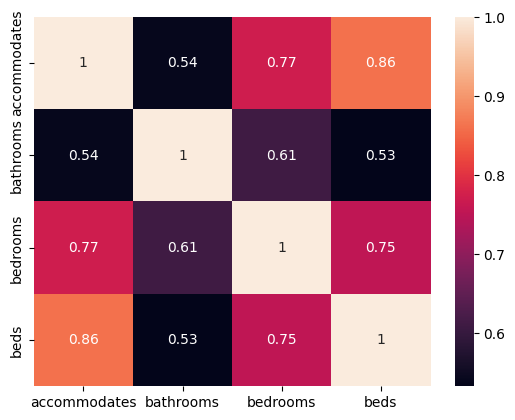

In [11]:
#Correlation matrix
sns.heatmap(df[['accommodates', 'bathrooms', 'bedrooms','beds']].corr(numeric_only=True), annot=True);

Interestingly, some people have to share beds as the correlation between beds and accomodates is less than 1, 0.86 to be precise. 

In [12]:
# Making life easier for me and defining a new dataframe related only to the beds...
df_beds = df[['accommodates', 'bathrooms', 'bedrooms','beds']]
df_beds

,accommodates,bathrooms,bedrooms,beds
0,4,1.0,1.0,1.0
1,4,1.0,1.0,1.0
2,11,4.5,5.0,7.0
3,3,1.0,0.0,2.0
4,6,2.0,3.0,3.0
...,...,...,...,...
3813,6,2.0,3.0,3.0
3814,4,1.0,1.0,2.0
3815,2,1.0,1.0,1.0
3816,2,1.0,0.0,1.0


In [14]:
# Cleaning the data of NaNs
df_beds_drop=df_beds.dropna()
df_beds_drop

,accommodates,bathrooms,bedrooms,beds
0,4,1.0,1.0,1.0
1,4,1.0,1.0,1.0
2,11,4.5,5.0,7.0
3,3,1.0,0.0,2.0
4,6,2.0,3.0,3.0
...,...,...,...,...
3813,6,2.0,3.0,3.0
3814,4,1.0,1.0,2.0
3815,2,1.0,1.0,1.0
3816,2,1.0,0.0,1.0


There were some NaNs, as the number of rows reduced from 3818 to 3796. 

In [15]:
#Let's see if dropping some rows changed number with respect to mean ...
df_beds_drop.describe() # Minimal changes nothing significant

,accommodates,bathrooms,bedrooms,beds
count,3796.000000,3796.000000,3796.000000,3796.000000
mean,3.350632,1.259879,1.308219,1.736828
std,1.980425,0.590745,0.884858,1.140937
min,1.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000
50%,3.000000,1.000000,1.000000,1.000000
75%,4.000000,1.000000,2.000000,2.000000
max,16.000000,8.000000,7.000000,15.000000


In [16]:
# Let's see how the number a AirBnB accomodates relates to the number of bathrooms, bedrooms and beds
X = df_beds_drop[['bathrooms','bedrooms','beds']]
y = df_beds_drop['accommodates']

In [17]:
# Split data into training and test set, fitting a linear model
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.30, random_state=42)
lm_model = LinearRegression()
lm_model.fit(X_train, y_train)

LinearRegression()

In [18]:
y_test_preds = lm_model.predict(X_test)
r2_test = r2_score(y_test, y_test_preds)

r2_test

0.7950600985069096

80% is not bad for a linear regression, but in this particular case it is a hint that there is a certain spread in the data

How to deal with cathegorical variables

In [19]:
#Lets see if room_type and bed_type are interesting
df[['room_type','bed_type']].head(60) #4 possible combinations, what to make of it

,room_type,bed_type
0,Entire home/apt,Real Bed
1,Entire home/apt,Real Bed
2,Entire home/apt,Real Bed
3,Entire home/apt,Real Bed
4,Entire home/apt,Real Bed
5,Private room,Real Bed
6,Private room,Real Bed
7,Private room,Real Bed
8,Private room,Real Bed
9,Entire home/apt,Real Bed


In [21]:
# Creating a new data frame with only the types
df_types = df[['room_type','bed_type']]
df_types

,room_type,bed_type
0,Entire home/apt,Real Bed
1,Entire home/apt,Real Bed
2,Entire home/apt,Real Bed
3,Entire home/apt,Real Bed
4,Entire home/apt,Real Bed
...,...,...
3813,Entire home/apt,Real Bed
3814,Entire home/apt,Real Bed
3815,Entire home/apt,Real Bed
3816,Entire home/apt,Real Bed


In [22]:
# Quick check, if all the lines are filled in.
df_drop = df_types.dropna()
df_drop

,room_type,bed_type
0,Entire home/apt,Real Bed
1,Entire home/apt,Real Bed
2,Entire home/apt,Real Bed
3,Entire home/apt,Real Bed
4,Entire home/apt,Real Bed
...,...,...
3813,Entire home/apt,Real Bed
3814,Entire home/apt,Real Bed
3815,Entire home/apt,Real Bed
3816,Entire home/apt,Real Bed


Not the most elegant method, but as df_drop and df_types have the same number of rows, all the rows are filled in.

In [24]:
# Getting the dummmy variables for the categorical variables
df_types_dummies = pd.get_dummies(df_types)
df_types_dummies

,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed
0,1,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...
3813,1,0,0,0,0,0,0,1
3814,1,0,0,0,0,0,0,1
3815,1,0,0,0,0,0,0,1
3816,1,0,0,0,0,0,0,1


First surprise: 3 different types of rooms instead of 2 from the first check, and 5 different types of beds instead of the 2 from the first check.

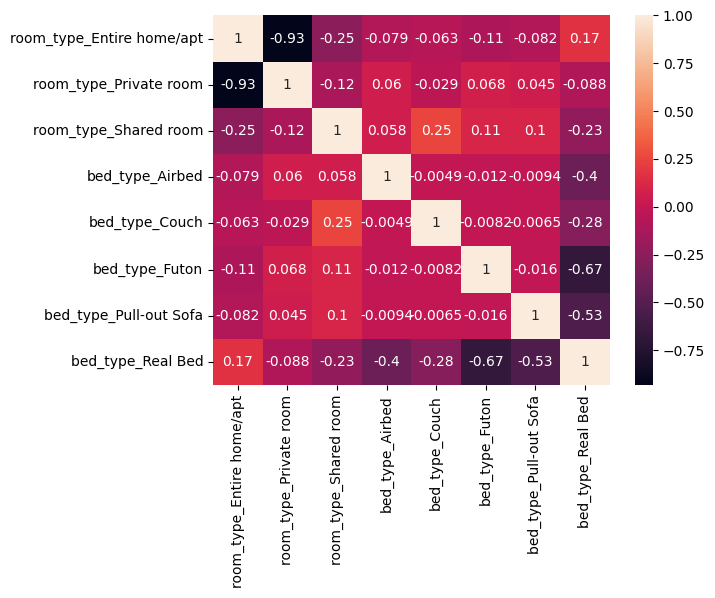

In [25]:
# Heat map/correlation give something
#Correlation matrix
sns.heatmap(df_types_dummies.corr(numeric_only=True), annot=True);

Some conclusions:
- Entire room/appartment correlates with real bed
- Interestingly private room does not really correlated with any bed type, I would have expected real bed
- Shared room correlateds with "provisional" bed types, like couch, futon and pull-out sofa and negative correlates with real bed. Interestingly shared room correlated the least with airbed of the made up beds and that is the type of bed AirB&B got its name from.